<a href="https://colab.research.google.com/github/jailer2024/JAILER-CHAPID-SE-ALES-Y-SISTEMAS/blob/main/c%C3%B3digos_Parcial_2_SyS_2024_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

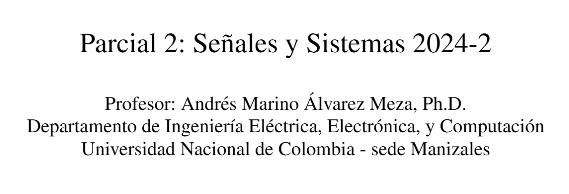

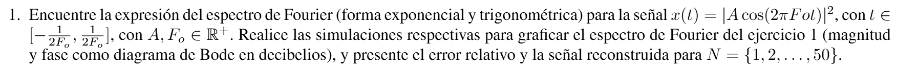

Bienvenido señor usuario, en este programa vamos a mostrar la gráfica de la función x(t) mostrada en el ejercicio: 
señor usuario, ¿le gustaría modificar el valor de A y fo, o le gustaría visualizar los valores predeterminados? (si/no): no
muy bien, vamos a mostrar la gráfica con los valores de entrada predeterminados: 
wo= 376.9911184307752
Fo= 592.1762640653615


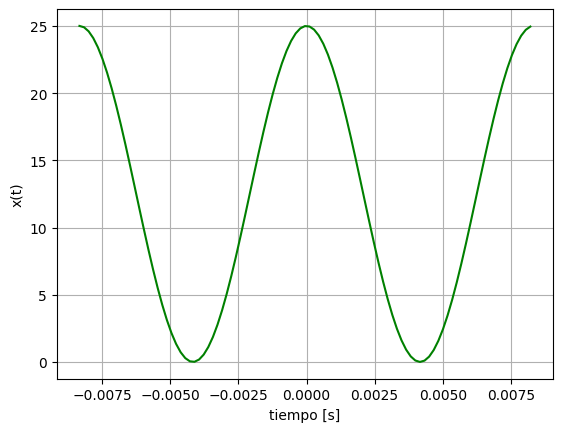

In [1]:
#simulación de la señal x(t)
print('Bienvenido señor usuario, en este programa vamos a mostrar la gráfica de la función x(t) mostrada en el ejercicio: ') #mensaje de bienvenida al usuario

import numpy as np
import matplotlib.pyplot as plt #importamos libreria para graficos

%matplotlib inline

def pregunta_opcion():
  respuesta = input('señor usuario, ¿le gustaría modificar el valor de A y fo, o le gustaría visualizar los valores predeterminados? (si/no): ').lower()#pide respuesta y la transforma a minusculas
  if respuesta == 'si' or respuesta == 'no':
    return respuesta #si la respuesta es valida, el sistema la toma
  else:
    print('Error, solo se aceptan respuestas como si o no, por favor vuelva a correr el programa')#se muestra cuando se ha ingresado entrada diferente a si o a no

#llamamos a la función
opcion = pregunta_opcion()
if opcion == 'si':
  print('muy bien, vamos a realizar la acción solicitada: ')

  print('por favor ingrese el valor de A: ')
  A = float(input())
  print('por favor ingrese el valor de fo, (use expresiones numéricas, ej: 3.14 para pi):')
  try:
    fo = float(eval(input()))
  except (NameError, TypeError, SyntaxError):
    print("Entrada inválida. Por favor ingrese un valor numérico o una expresión numérica válida.")

  ti = (-1/(2*fo)) #tiempo inicial
  tf =  (1/(2*fo)) #tiempo final
  T = tf-ti #periodo de la señal
  wo = 2*np.pi/T #frecuencia angular
  Fo = wo/2*np.pi #frecuencia fundamental
  print('wo=',wo)
  print('Fo=',Fo)
  Fs = 10*Fo #frecuencia muestreo -> debe respetar Nyquist Fs >= 2 Fo
  tv = np.arange(ti,tf,1/Fs) #vector de tiempo
  Nm = len(tv) # Numero de muestras requeridas

  x = abs(A*np.cos((wo*tv)))**2 #señal de entrada
  plt.plot(tv,x, color ='green') #gráfica de la señal
  plt.xlabel('tiempo [s]')
  plt.ylabel('x(t)')
  plt.grid()
  plt.show()

elif opcion == 'no':
  print('muy bien, vamos a mostrar la gráfica con los valores de entrada predeterminados: ')
  A = 5
  fo = 60
  ti = (-1/(2*fo)) #tiempo inicial
  tf =  (1/(2*fo)) #tiempo final
  T = tf-ti #periodo de la señal
  wo = 2*np.pi/T #frecuencia angular
  Fo = wo/2*np.pi #frecuencia fundamental
  print('wo=',wo)
  print('Fo=',Fo)
  Fs = 10*Fo #frecuencia muestreo -> debe respetar Nyquist Fs >= 2 Fo
  tv = np.arange(ti,tf,1/Fs) #vector de tiempo
  Nm = len(tv) # Numero de muestras requeridas

  x = abs(A*np.cos((wo*tv)))**2 #señal de entrada
  plt.plot(tv,x, color ='green') #gráfica de la señal
  plt.xlabel('tiempo [s]')
  plt.ylabel('x(t)')
  plt.grid()
  plt.show()

**2.BASES DE LA SERIE DE FOURIER**

In [2]:
#se crean las bases de la serie exponencial compleja de Fourier
T = tf - ti #intervalo de interés
N = 50 #número armonicos a simular
wo = 2*np.pi/T # frecuencia fundamental
# definir bases
phin = np.zeros((len(tv),2*N+1),dtype=np.complex_)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

**3.CALCULAR EL ESPECTRO DE FPURIER**

In [3]:
#calcular espectro -> cambiar según la señal estudiada
cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector armónicos
cn[N] = (A**2 / 2) # nivel dc C_0
cn[N-2] = (A**2 / 4) #armónico -2
cn[N+2] = (A**2 / 4) #armónico +2

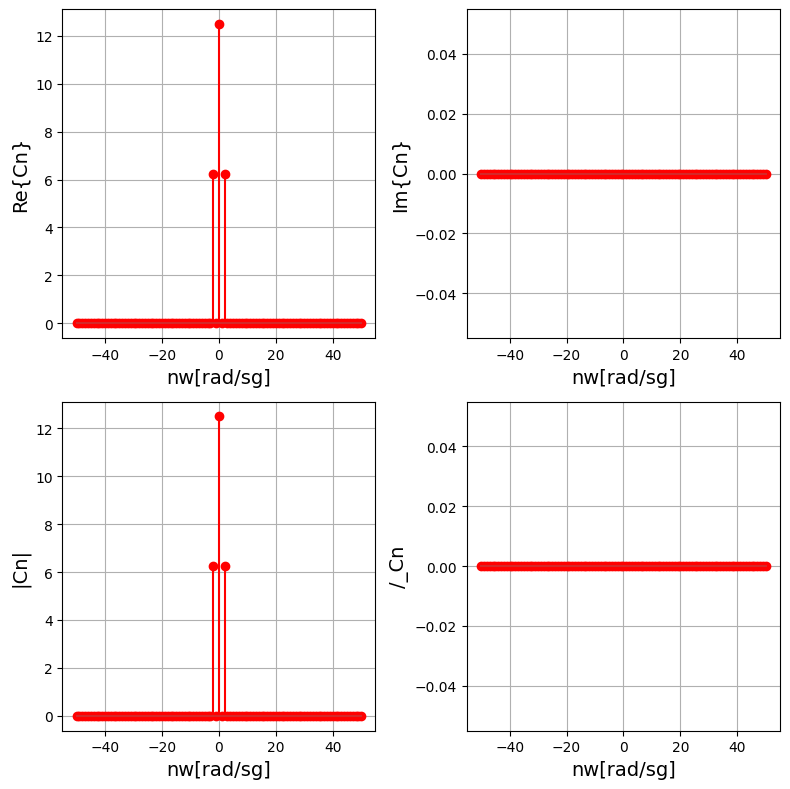

In [6]:
#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(cn), 'r')
plt.xlabel(r'nw[rad/sg]',fontsize = 14)
plt.ylabel(r'Re{Cn}',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(cn), 'r')
plt.xlabel(r'nw[rad/sg]',fontsize = 14)
plt.ylabel(r'Im{Cn}',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(cn), 'r')#magnitud del espectro
plt.xlabel(r'nw[rad/sg]',fontsize = 14)
plt.ylabel(r'|Cn|',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(cn), 'r')#fase del espectro
plt.xlabel(r'nw[rad/sg]',fontsize = 14)
plt.ylabel(r'/_Cn',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()



**4.RECONSTRUCION DE LA SEÑAL**

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


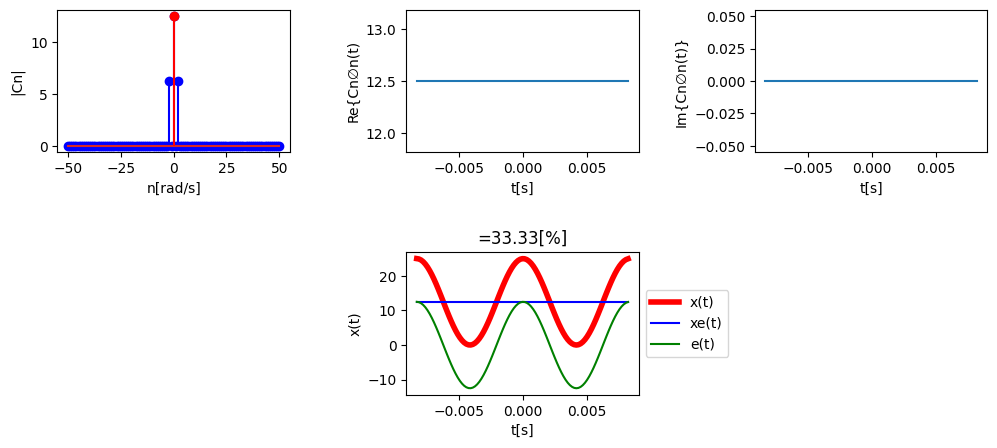

In [7]:
from matplotlib import animation, rc
from IPython.display import HTML

#reconstrucción
Px = (3*A**4)/8
#figura y axes animaciónx
fig, ax = plt.subplots(2, 3,figsize=(12,5))
#función para gráfico interactivo
def update(n):
    #actualización regresor Bayesiano
    #Graficar prior
    ax[0,0].clear()
    ax[0,1].clear()
    ax[0,2].clear()
    ax[1,0].clear()
    ax[1,1].clear()
    ax[1,2].clear()

    #espectro
    ind = np.arange(N-n,N+n+1) #armónicos a considerar
    ax[0,0].stem(nv, abs(cn), 'b')#magnitud del espectro
    ax[0,0].stem(nv[ind], abs(cn[ind]), 'r')#magnitud del espectro
    ax[0,0].set_xlabel(r'n[rad/s]')
    ax[0,0].set_ylabel(r'|Cn|')

    #componentes espectrales
    ce = phin[:,ind].dot(np.diag(cn[ind]) )
    ax[0,1].plot(tv,np.real(ce))#componente real
    ax[0,1].set_xlabel('t[s]')
    ax[0,1].set_ylabel('Re{Cn∅n(t)')

    ax[0,2].plot(tv,np.imag(ce))#componente imaginario
    ax[0,2].set_xlabel('t[s]')
    ax[0,2].set_ylabel('Im{Cn∅n(t)}')




    #reconstruccion
    er = 1- np.sum(abs(cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(cn[ind] ) # dot calcula el producto entre vectores
    #error en t
    et = x - xe

    ax[1,1].plot(tv,x,'r',linewidth=4,label='x(t)')
    ax[1,1].plot(tv,xe,color='b',label='xe(t)') # señal estimada o filtrada
    ax[1,1].plot(tv,et,color='g',label='e(t)') # señal estimada o filtrada
    ax[1,1].set_title('=%.2f[%%]' % (100*er))
    ax[1,1].set_xlabel('t[s]')
    ax[1,1].set_ylabel('x(t)')
    ax[1,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax[1,0].axis('off')
    ax[1,2].axis('off')
    plt.subplots_adjust(wspace=0.5,hspace=0.7)
    plt.show()

#desplegar animación
anim = animation.FuncAnimation(fig, update, frames=np.arange(0,N+1,1), blit=False)
rc('animation', html='jshtml')


**DIAGRAMA DE BODE**

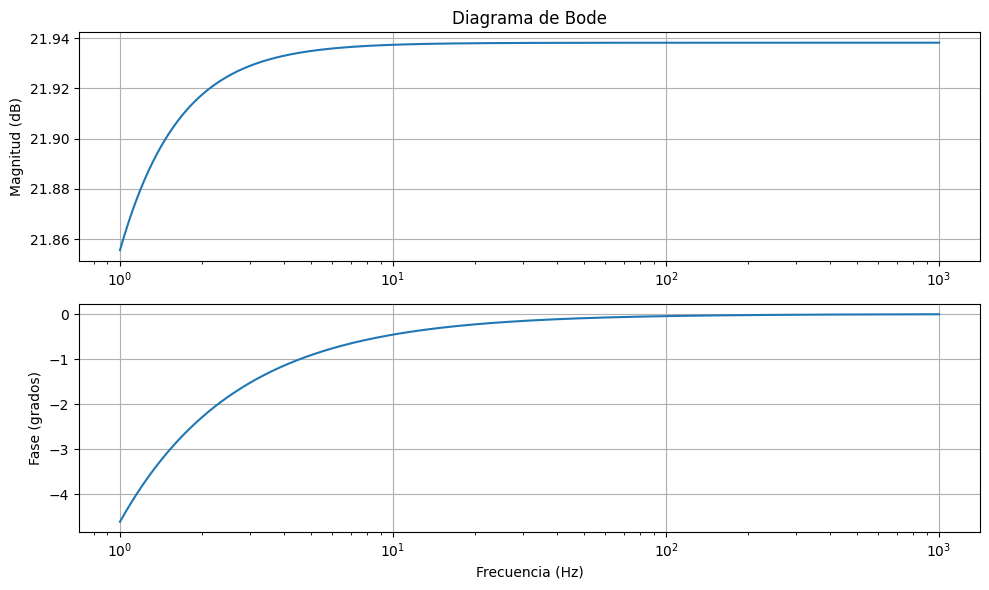

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Frecuencias de interés (en un rango alrededor de las frecuencias de interés)
frecuencias = np.logspace(0, 3, 1000)  # Rango logarítmico de frecuencias

# Función de transferencia para el espectro de Fourier de x(t)
# La señal tiene picos en f = 0 y f = +2, -2, así que usamos diracs en esas frecuencias
numerador = [A**2 / 2, A**2 / 4, A**2 / 4]  # Picos en 0, 2, -2
denominador = [1, 0, 0]  # Sistema no tiene un componente dinámico en sí

# Generamos la función de transferencia
system = signal.TransferFunction(numerador, denominador)

# Graficamos el diagrama de Bode
w, mag, phase = signal.bode(system, frecuencias * 2 * np.pi)  # Convertimos de Hz a radianes

# Graficar la magnitud y la fase
plt.figure(figsize=(10, 6))

# Magnitud
plt.subplot(2, 1, 1)
plt.semilogx(w / (2 * np.pi), mag)  # w convertido de radianes a Hz
plt.title('Diagrama de Bode')
plt.ylabel('Magnitud (dB)')
plt.grid(True)

# Fase
plt.subplot(2, 1, 2)
plt.semilogx(w / (2 * np.pi), phase)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Fase (grados)')
plt.grid(True)

plt.tight_layout()
plt.show()


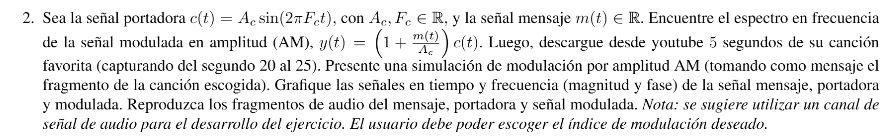

**SIMULACION**

**Descargar mp3 cancion de youtube**

In [9]:
!pip install yt-dlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 76.5 MB/s eta 0:00:00


**Link de la cancion con nombre y salida**

In [10]:
name = ['The goodfather']
link = "https://www.youtube.com/watch?v=HWqKPWO5T4o"
!yt-dlp --extract-audio --audio-format mp3 -o "audio.%(ext)s" {link}


[youtube] Extracting URL: https://www.youtube.com/watch?v=HWqKPWO5T4o
[youtube] HWqKPWO5T4o: Downloading webpage
[youtube] HWqKPWO5T4o: Downloading tv client config
[youtube] HWqKPWO5T4o: Downloading player 0f7c1eff
[youtube] HWqKPWO5T4o: Downloading tv player API JSON
[youtube] HWqKPWO5T4o: Downloading ios player API JSON
[youtube] HWqKPWO5T4o: Downloading m3u8 information
[info] HWqKPWO5T4o: Downloading 1 format(s): 251
[download] Destination: audio.webm
[download] 100% of    2.92MiB in 00:00:00 at 13.86MiB/s
[ExtractAudio] Destination: audio.mp3
Deleting original file audio.webm (pass -k to keep)


**convertir mp3 a wab**

In [11]:
#convertir a .wav con ffmpeg para extraer audio en python
!ffmpeg -i audio.mp3 output.wav


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

**Leer wab en numpy**

In [12]:

!pip install soundfile

In [13]:
import soundfile as sf # para instalar pip install soundfile
from IPython.display import Audio #librería para reproducir audio
#lee archivos wav

nombre_out = "output.wav"
x, fs = sf.read(nombre_out)

print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))


Frecuencia de muestreo 48000.00[Hz]
audio output.wav


**Grafico en un intervalo de la señal de audio estereo(canal 1 y canal 2) en el dominio del tiempo**

<ipython-input-15-14971757f499>:8: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('canal 1', 'canal 2')
<ipython-input-15-14971757f499>:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


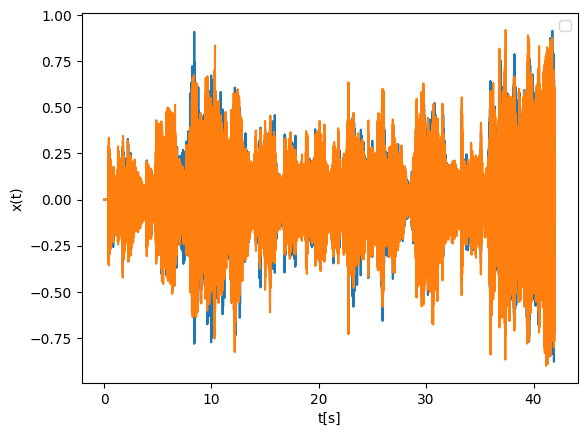

In [15]:

xpro = x.copy() #copiar archivos para procesar
ti = 0 #tiempo incio a procesar seg
tf = 42 #tiempo final a procesar seg
xs = xpro[int(ti*fs):int((tf*fs)),:]

tt = np.arange(ti,tf,1/fs) # vector de tiempo
plt.plot(tt,xs)
plt.legend('canal 1', 'canal 2')
plt.xlabel('t[s]')
plt.ylabel('x(t)')
plt.legend()
plt.show()

In [ ]:

from IPython.display import Audio
ns = 42 #se reproducen los primeros ns segundos
Audio(x[:int(fs*ns),:].T,rate=fs)